In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

from plotly import tools
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
d1=pd.read_csv("DEXINUS.csv")

In [3]:
d1.head()

,observation_date,DEXINUS
0,02-01-1973,8.02
1,03-01-1973,8.02
2,04-01-1973,8.00
3,05-01-1973,8.01
4,08-01-1973,8.00


<AxesSubplot:ylabel='DEXINUS'>

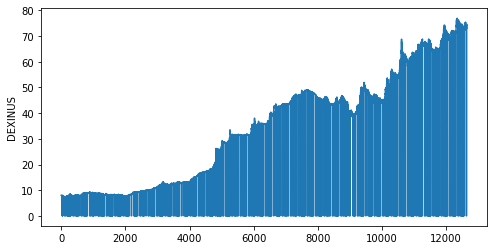

In [20]:
import 
plt.figure(figsize=(8,4))
sns.lineplot(data=d1['DEXINUS'] )

In [21]:
d1.query('DEXINUS != DEXINUS')

,observation_date,DEXINUS


In [23]:
df=d2[['observation_date', 'DEXINUS']]
df.columns=['odate','dx']

In [6]:
df.tail()

,odate,dx
12644,21-06-2021,74.18
12645,22-06-2021,74.37
12646,23-06-2021,74.13
12647,24-06-2021,74.14
12648,25-06-2021,74.14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   odate   12649 non-null  object 
 1   dx      12649 non-null  float64
dtypes: float64(1), object(1)
memory usage: 197.8+ KB


In [8]:
df['dx']=pd.to_numeric(df.dx)

In [9]:
df=df.sort_values('odate', ascending=True)

In [10]:
df.dx.describe()

count    12649.000000
mean        32.870231
std         21.709395
min          0.000000
25%         10.190000
50%         35.200000
75%         47.150000
max         76.950000
Name: dx, dtype: float64

In [11]:
df.isnull().sum()

odate    0
dx       0
dtype: int64

In [12]:
df['dx']=pd.to_numeric(df['dx'],downcast="float")

In [13]:
df.duplicated().sum()

0

C:\Users\rishi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


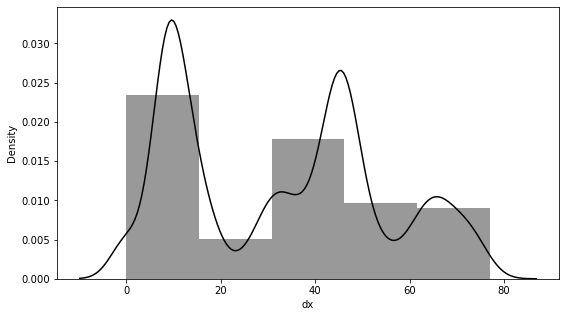

In [16]:
plt.figure(figsize=(9,5))
sns.distplot(df.dx, bins=5, color='black');
plt.show()

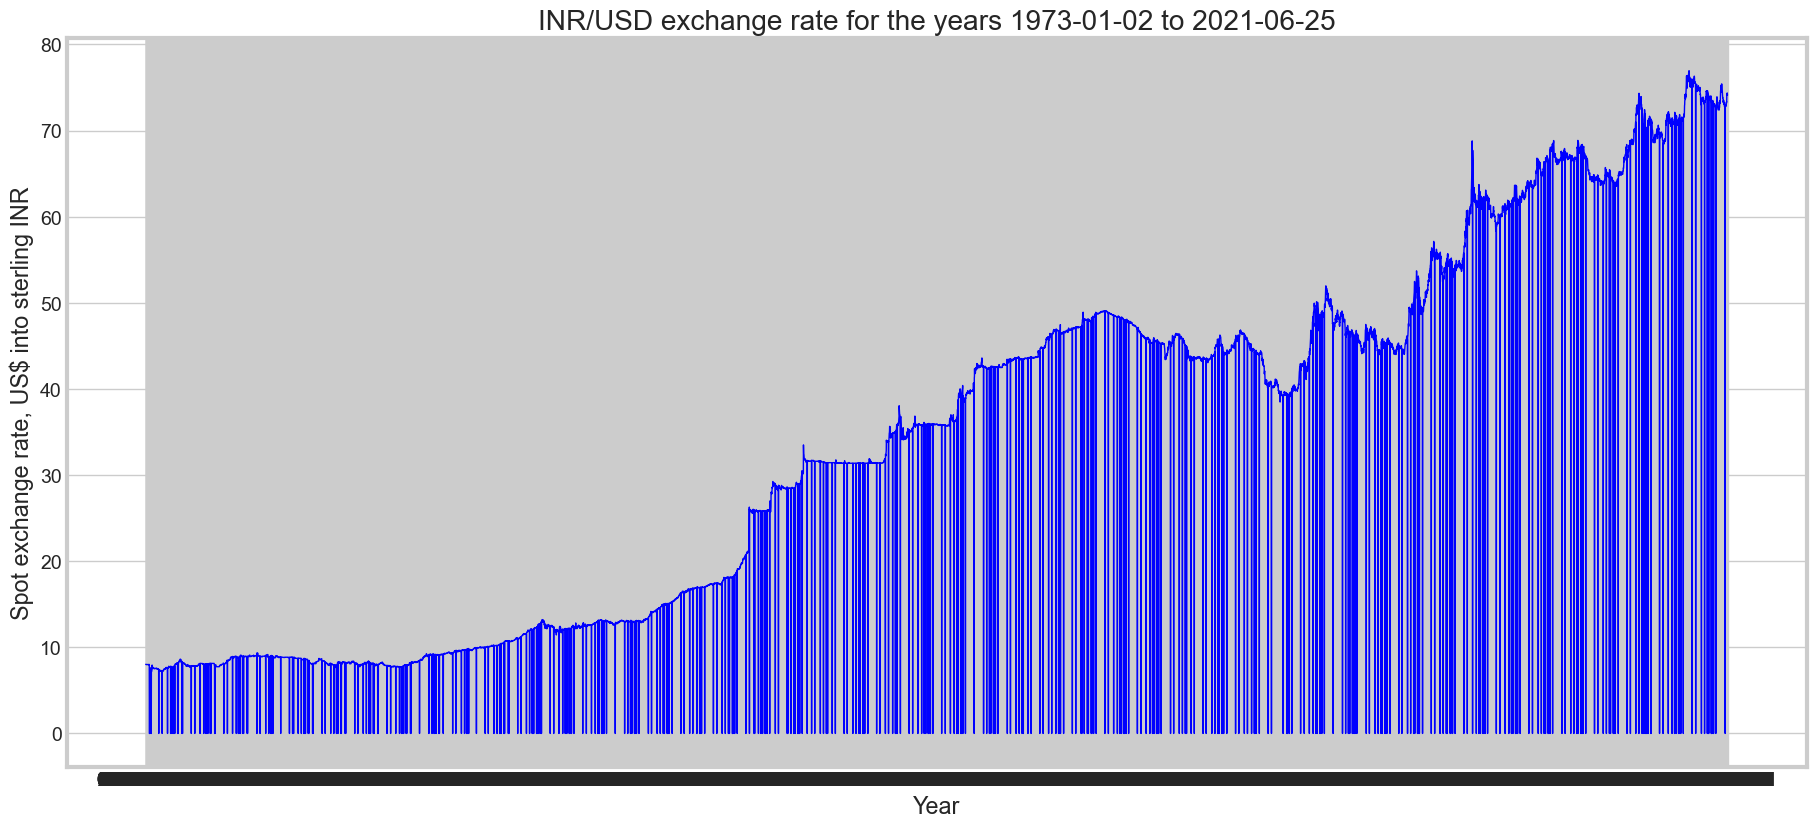

In [31]:
plt.figure(figsize=(20,9),dpi=100)
sns.lineplot(data=df,x=df.odate,y=df.dx,color='blue', linewidth=1)
plt.ylabel('Spot exchange rate, US\$ into sterling INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()

In [32]:
import plotly.express as px
fig = px.line(d1, x = 'observation_date', y='DEXINUS', title ='India-US exchange rate' )

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=15, label="15y", step="year", stepmode="backward"),
            dict(step="all"),
        ])
    )
)
fig.show()

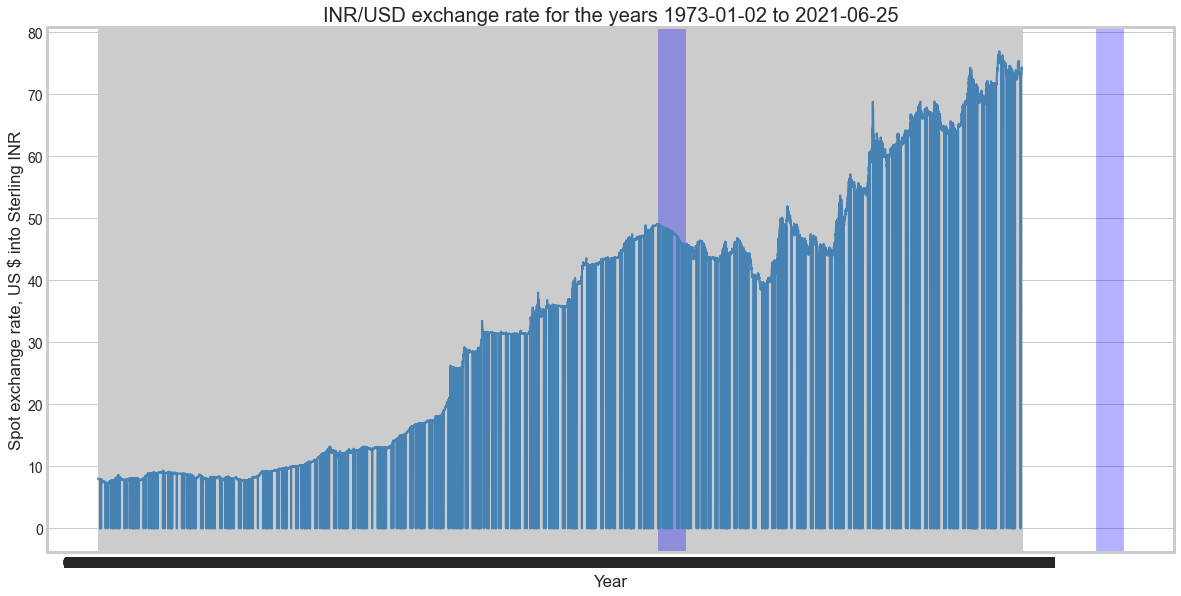

In [33]:
import datetime as dt
fig, ax = plt.subplots(figsize=(18,9))
sns.lineplot(data=d1,x=d1.observation_date, y=d1.DEXINUS,color='steelblue', linewidth = 2)
ax.axvspan(date2num(dt.datetime(1991,1,1)), date2num(dt.datetime(1992,1,1)), color="blue", alpha=0.3)
ax.axvspan(date2num(dt.datetime(2007,6,1)), date2num(dt.datetime(2008,6,1)), color="blue", alpha=0.3)
plt.ylabel('Spot exchange rate, US \$ into Sterling INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()